## Oracle for Neural Network Architecture

### Things to note: (My explanations)
1. Quantum operations need to be reversible. Thus, the neural network layers also need to be reversible, i.e. the outputs should be mapped back to the inputs and respective weights. This can be done with the help of an oracle (Refer: Deutsch-Jozsa algorithm).
2. Quantum states need to be normalized. (See how?!)
3. Check out for the No-Cloning Theorem!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import torch
# from torch import nn
# import torch.nn.functional as F
# from torchvision import datasets, transforms

from qiskit import *
from qiskit.visualization import *

In [3]:
def before_oracle(circuit, input_qubits):
    circuit.x(input_qubits)
    
    for qubit in range(input_qubits+1):
        circuit.h(qubit)

In [18]:
def nn_oracle(input_qubits):
    qc = QuantumCircuit(input_qubits+1)
    
#   Insert some code. (Maybe some activation function!)
# Now, linear aactivation function would not make sense becuase the Hadaamrd gate already brings the qubits
# in a state of superposition, which itself is a linear combination with normalized quantum states.
    
    nn_oracle_gate = qc.to_gate()
    nn_oracle_gate.name = 'NN_Oracle'
    
    return nn_oracle_gate

In [19]:
def after_oracle(circuit, input_qubits):
    for qubit in range(input_qubits):
        circuit.h(qubit)

In [20]:
def main(input_qubits):
    qc = QuantumCircuit(input_qubits+1, input_qubits)    # +1 for Ancilla qubit
    
    before_oracle(qc, input_qubits)
    qc.barrier()
    
    nn_oracle_gate = nn_oracle(input_qubits)
    qc.append(nn_oracle_gate, range(input_qubits+1))
    
    qc.barrier()
    after_oracle(qc, input_qubits)
    
    qc.barrier()
    qc.measure(range(input_qubits), range(input_qubits))    # Check which qubits to measure! input_qubits or ancilla?
    
    display(qc.draw('mpl'))
    
    return qc

Enter number of qubit inputs: 3


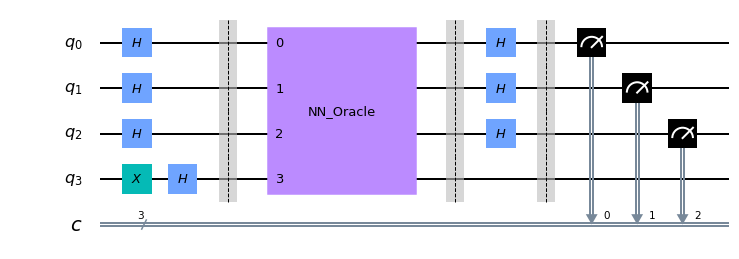

In [21]:
input_qubits = int(input('Enter number of qubit inputs: '))
main(input_qubits)

### References
1. https://silky.github.io/posts/2016-12-11-quantum-neural-networks.html